In [5]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import glob

file_list = glob.glob("./fits_files/Run*.fits.gz")
file_list.sort()
#print(file_list)

saved_headers = []
saved_header_keys = [
    'RUNID',
    'EVENTID',
    'START',
    'EVENTMJD',
    'I3TYPE',
    'RA',
    'DEC',
    'RA_ERR_PLUS',
    'RA_ERR_MINUS',
    'DEC_ERR_PLUS',
    'DEC_ERR_MINUS',
    'ENERGY',
    'FAR',
    'SIGNAL',
    'CASCADE_SCR',
    'SKIMMING_SCR',
    'START_SCR',
    'STOP_SCR',
    'THRGOING_SCR',
    'CR_VETO'
]
decs = []
sigs = []
enrgs = []
fars = []
decs_g = []
sigs_g = []
enrgs_g = []
fars_g = []
ang_err_g = []
ang_err_b = []
for fitsfile in file_list:
    skymap, header = hp.read_map(fitsfile,h=True, verbose=False)
    header = dict(header)
    if header is not None:
        save_header = {key: header[key] for key in saved_header_keys}
        saved_headers.append(save_header)
        class_string = ''
        for val in ['CASCADE_SCR','THRGOING_SCR','START_SCR','STOP_SCR','SKIMMING_SCR']:
            if header[val]>0.03:
                class_string = class_string + val + ':' + f'{header[val]:5} '
        print(f'{fitsfile[13:32]} MJD: {header["EVENTMJD"]:5.2f} SCAN RA: {header["RA"]:6} (+{header["RA_ERR_PLUS"]:4} -{header["RA_ERR_MINUS"]:4})' \
              f' DEC: {header["DEC"]:6} (+{header["DEC_ERR_PLUS"]:4} -{header["DEC_ERR_MINUS"]:4})' \
              f' E: {header["ENERGY"]:7.2f} S: {(header["SIGNAL"]*100.0):5.2f}%  FAR: {header["FAR"]:7} type:{header["I3TYPE"]:10}' \
              f' {class_string}')
        if 'GCN_URL' in header:
            print(header['GCN_URL'])
        if 'GCN' in header:
            print('WRONG GCN NAME TAG!')
              #f' CSC_P: {header["CASCADE_SCR"]:5.3} THRU_P: {header["THRGOING_SCR"]:5.3} START_P: {header["START_SCR"]:5.3} STOP_P: {header["STOP_SCR"]:5.3} SKIM_P:{header["SKIMMING_SCR"]:5.3}')
              #decs.append(header["DEC"])
        #sigs.append(header["SIGNAL"])
        #enrgs.append(header["ENERGY"])
        #fars.append(header["FAR"])
        ang_err = (header["DEC_ERR_PLUS"] + header["DEC_ERR_MINUS"] + header["RA_ERR_PLUS"] + header["RA_ERR_MINUS"])/4.0
        if 'gold' in header["I3TYPE"]:
            decs_g.append(header["DEC"])
            sigs_g.append(header["SIGNAL"])
            enrgs_g.append(header["ENERGY"])
            fars_g.append(header["FAR"])
            ang_err_g.append(ang_err)
        else:
            decs.append(header["DEC"])
            sigs.append(header["SIGNAL"])
            enrgs.append(header["ENERGY"])
            fars.append(header["FAR"])
            ang_err_b.append(ang_err)

#print(decs,decs_g)
#print(sigs,sigs_g)
#print(enrgs,enrgs_g)
#print(fars,fars_g)


/opt/conda/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


Run118178_17334444_ MJD: 55695.06 SCAN RA: 138.47 (+6.68 -3.78) DEC:  -1.94 (+0.97 -1.12) E:  187.00 S: 50.80%  FAR:     1.3 type:gfu-gold   THRGOING_SCR:0.919 START_SCR:0.0811 
Run118309_46569873_ MJD: 55722.43 SCAN RA: 272.55 (+1.67 -2.42) DEC:  35.64 (+ 1.3 -1.05) E:  294.00 S: 75.00%  FAR:    0.25 type:gfu-gold   THRGOING_SCR:  1.0 
Run118342_24578488_ MJD: 55728.73 SCAN RA:  71.15 (+1.41 -2.07) DEC:   5.38 (+0.79 - 0.9) E:  109.00 S: 25.70%  FAR:    4.34 type:gfu-bronze THRGOING_SCR:  1.0 
Run118435_58198553_ MJD: 55756.11 SCAN RA:   68.2 (+0.31 - 1.1) DEC:  40.67 (+0.44 -0.44) E:   72.00 S: 77.80%  FAR:    0.11 type:hese-gold  THRGOING_SCR:0.124 START_SCR:0.876 
Run118475_52691508_ MJD: 55768.51 SCAN RA: 151.08 (+1.19 -1.71) DEC:   6.99 (+0.98 -0.83) E:  160.00 S: 39.60%  FAR:    1.92 type:gfu-bronze CASCADE_SCR: 0.05 START_SCR:0.946 
Run118539_54350726_ MJD: 55780.98 SCAN RA:  336.8 (+1.36 -1.98) DEC:   1.53 (+0.93 -0.78) E:  108.00 S: 26.60%  FAR:    4.45 type:gfu-bronze THRGOI

In [6]:
file = open('./run_to_ic.txt')
name_dict = {}
for line in file:
    id, name = line.split(" ")
    name_dict[id] = name.strip()

#print(name_dict)

# Make sure all entries are unique.
## https://stackoverflow.com/questions/31904029/check-for-unique-values-in-a-dictionary-and-return-a-list
from collections import Counter
cn = Counter(name_dict.values())
print(sorted(k for k,v in name_dict.items() if cn[v] != 1))

# now lookup name and add to saved_headers
#print(saved_headers[0]['RUNID'],saved_headers[0]['EVENTID'])
for entry in saved_headers:
    run_evid = str(entry['RUNID']) + '_' + str(entry['EVENTID'])
    #print(name_dict[run_evid])
    entry['NAME'] = name_dict[run_evid]

[]


In [30]:
file2 = open('./v2_other_selections.txt')
alt_name_dict = {}
for line in file2:
    run, evnum, primary, alt_id = line.split("\t")
    #print(run.strip(),evnum.strip(),primary.strip(),alt_id.strip())
    index = run.strip() + '_' + evnum.strip()
    alt_name_dict[index] = [primary.strip(),alt_id.strip()]
#print(alt_name_dict)

#now find the value and add extra entry...
for entry in saved_headers:
    run_evid = str(entry['RUNID']) + '_' + str(entry['EVENTID'])
    if alt_name_dict[run_evid][0] != entry['I3TYPE']:
        print(run_evid)
        print(alt_name_dict[run_evid])
        print(entry['I3TYPE'])
    #print(alt_name_dict[run_evid][1])
    entry['OTHER_I3TYPES'] = alt_name_dict[run_evid][1]

In [31]:
import csv
#header_keys = list(saved_headers[0].keys())
header_keys = ['NAME'] + saved_header_keys + ['OTHER_I3TYPES']
print(header_keys)
with open('IceCube_Gold_Bronze_Tracks.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=header_keys)
    writer.writeheader()
    writer.writerows(saved_headers)
#print(saved_headers[0].values())

['NAME', 'RUNID', 'EVENTID', 'START', 'EVENTMJD', 'I3TYPE', 'RA', 'DEC', 'RA_ERR_PLUS', 'RA_ERR_MINUS', 'DEC_ERR_PLUS', 'DEC_ERR_MINUS', 'ENERGY', 'FAR', 'SIGNAL', 'CASCADE_SCR', 'SKIMMING_SCR', 'START_SCR', 'STOP_SCR', 'THRGOING_SCR', 'CR_VETO', 'OTHER_I3TYPES']


172 103 275


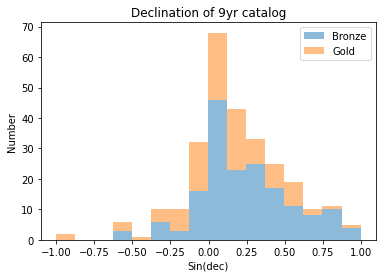

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
sindecs = np.sin(np.deg2rad(decs))
sindecs_g = np.sin(np.deg2rad(decs_g))

plt.hist([sindecs,sindecs_g],stacked=True, bins=16,alpha = 0.5, label=['Bronze','Gold'])
plt.legend(loc="upper right")
plt.xlabel('Sin(dec)')
plt.ylabel('Number')
plt.title('Declination of 9yr catalog')
fig.savefig('sindec_dist.png', bbox_inches='tight')

print(len(sindecs), len(sindecs_g),len(sindecs) + len(sindecs_g) )

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(sigs, bins=20,stacked=False,histtype='stepfilled',alpha = 0.5,range=[0.,1.0],label='Bronze')
ax.hist(sigs_g, bins=20,stacked=False,histtype='stepfilled',alpha = 0.5,range=[0.,1.0],label='Gold')

plt.legend(loc="upper right")
plt.xlabel('Signalness')
plt.ylabel('Number')
plt.title('Signalness of 9yr catalog')
fig.savefig('signalness_dist.png', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
logenrgs = np.log10(enrgs)
logenrgs_g = np.log10(enrgs_g)

ax.hist(logenrgs, bins=20,stacked=True, alpha = 0.5, range=[1.0,5.0], label='Bronze')
ax.hist(logenrgs_g, bins=20,stacked=True, alpha = 0.5, range=[1.0,5.0], label='Gold')

plt.xlabel('Log10E (TeV)')
plt.ylabel('Number')
plt.legend(loc="upper right")
plt.title('Energy of 9yr catalog')
fig.savefig('energy_dist.png', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(ang_err_b, bins=20,stacked=True, alpha = 0.5, range=[0.0,10.0], label='Bronze')
ax.hist(ang_err_g, bins=20,stacked=True, alpha = 0.5, range=[0.0,10.0], label='Gold')

plt.xlabel('Angular Error (deg)')
plt.ylabel('Number')
plt.legend(loc="upper right")
plt.title('GCN Angular error (90\%) of 9yr catalog')
fig.savefig('ang_err_dist.png', bbox_inches='tight')

print(np.median(ang_err_b))
print(np.median(ang_err_g))

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(fars, bins=20,stacked=True, alpha=0.5, range=[0.0,5.0], label='Bronze')
ax.hist(fars_g, bins=20,stacked=True, alpha=0.5, range=[0.0,5.0], label='Gold')
plt.xlabel('FAR (1/yr)')
plt.ylabel('Number')
plt.legend(loc="upper right")
plt.title('False alarm rate of 9yr catalog')
fig.savefig('far_dist.png', bbox_inches='tight')

In [ ]:
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(logenrgs,sindecs, s=10, alpha=0.5, marker="s", label='Bronze')
ax1.scatter(logenrgs_g,sindecs_g, s=10, alpha=0.5, marker="o", label='Gold')
plt.xlabel('Log10E (TeV)')
plt.ylabel('Sin(dec)')
plt.legend(loc='upper right')
fig.savefig('energ-dec_scatter.png', bbox_inches='tight')
plt.show()


#plt.scatter(logenrgs,sindecs, label='Bronze')
#plt.xlabel('Log10E (TeV)')
#plt.ylabel('Sin(dec)')
#plt.legend(loc='upper right', fontsize=16,)

#plt.show()